In [ ]:
import os
from zipfile import ZipFile

# Assurez-vous que vous avez déplacé votre 'kaggle.json' au bon endroit
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

# Téléchargement du dataset
dataset = "syedfaizanalii/predict-students-dropout-and-academic-success"
os.system(f'kaggle datasets download -d {dataset}')

# Extraction du fichier ZIP dans le dossier courant
zip_file = dataset.split('/')[-1] + '.zip'
with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extraction dans le dossier courant

print("Téléchargement et extraction réussis dans le dossier courant.")

Téléchargement et extraction réussis dans le dossier courant.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nouvelle section

In [ ]:
# Chemin du fichier CSV
file_path = 'Predict Student Dropout and Academic Success.csv'

# Lire le fichier CSV avec pandas
df = pd.read_csv(file_path, sep=';')

# Afficher les premières lignes du DataFrame
df.head(5)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Check for duplicates across all columns
duplicates_all_cols = df[df.duplicated()]

# Check for duplicates in specific columns (e.g., 'col1', 'col2')
#duplicates_subset = df[df.duplicated(subset=['col1', 'col2'])]

# Print the results
if duplicates_all_cols.empty:
  print("No duplicates found across all columns.")
else:
  print("Duplicates found across all columns:")
  print(duplicates_all_cols)


No duplicates found across all columns.


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the results
print(missing_values)


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

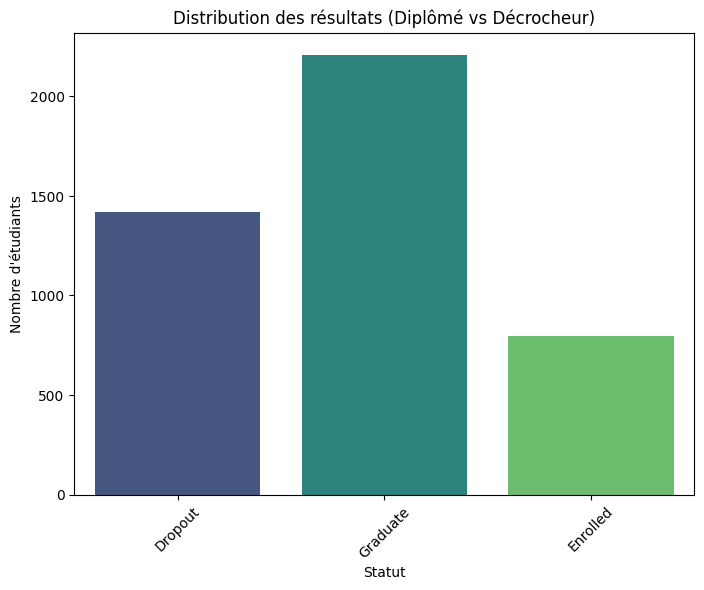

In [ ]:

# Compter le nombre de diplômés et de décrocheurs
graduation_counts = df['Target'].value_counts()

# Visualisation : Histogramme des résultats
plt.figure(figsize=(8, 6))
#sns.countplot(data=df, x='Target', palette='viridis')
sns.countplot(data=df, x='Target', hue='Target', palette='viridis')

plt.title('Distribution des résultats (Diplômé vs Décrocheur)')
plt.xlabel('Statut')
plt.ylabel('Nombre d\'étudiants')
plt.xticks(rotation=45)
plt.show()


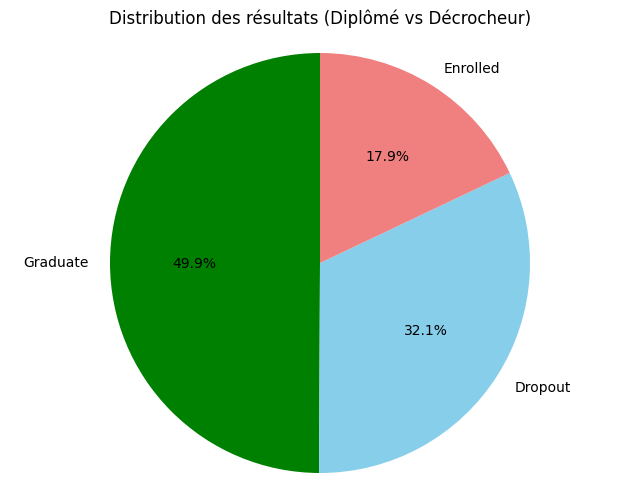

In [ ]:
# Assuming your DataFrame is named 'df' and the target column is 'Target'
graduation_counts = df['Target'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(graduation_counts, labels=graduation_counts.index, autopct='%1.1f%%', startangle=90, colors=['green','skyblue', 'lightcoral'])
plt.title('Distribution des résultats (Diplômé vs Décrocheur)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Assuming your DataFrame is named 'df'
numerical_features = ['Previous qualification (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
central_tendency = df[numerical_features].agg(['mean', 'median', 'std'])

print(central_tendency)

        Previous qualification (grade)  Unemployment rate  Inflation rate  \
mean                        132.613314          11.566139        1.228029   
median                      133.100000          11.100000        1.400000   
std                          13.188332           2.663850        1.382711   

             GDP  
mean    0.001969  
median  0.320000  
std     2.269935  


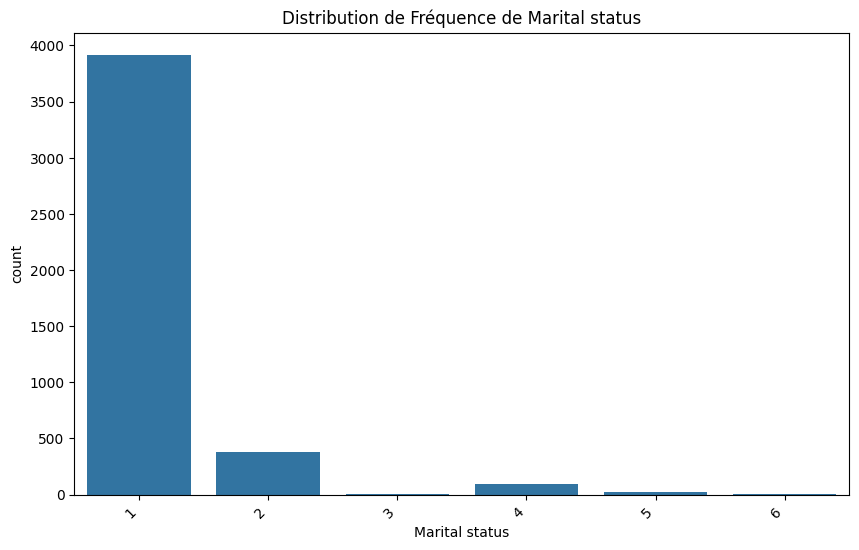

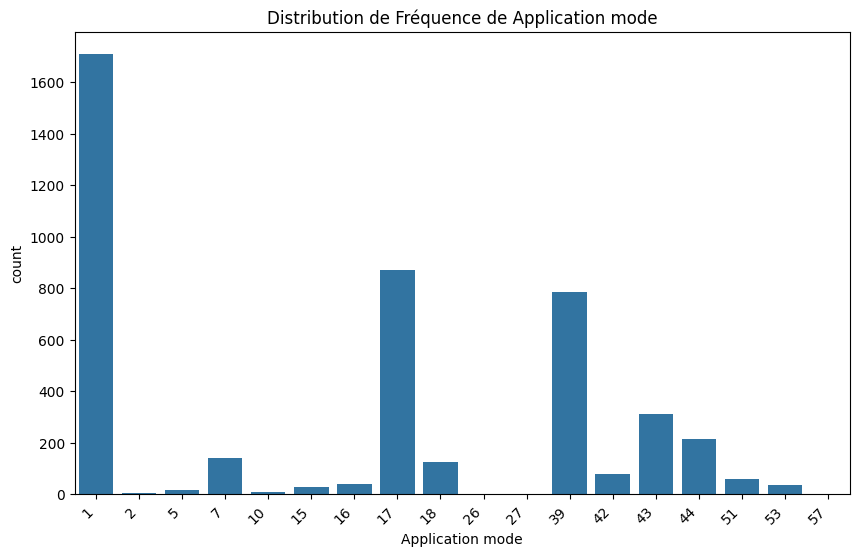

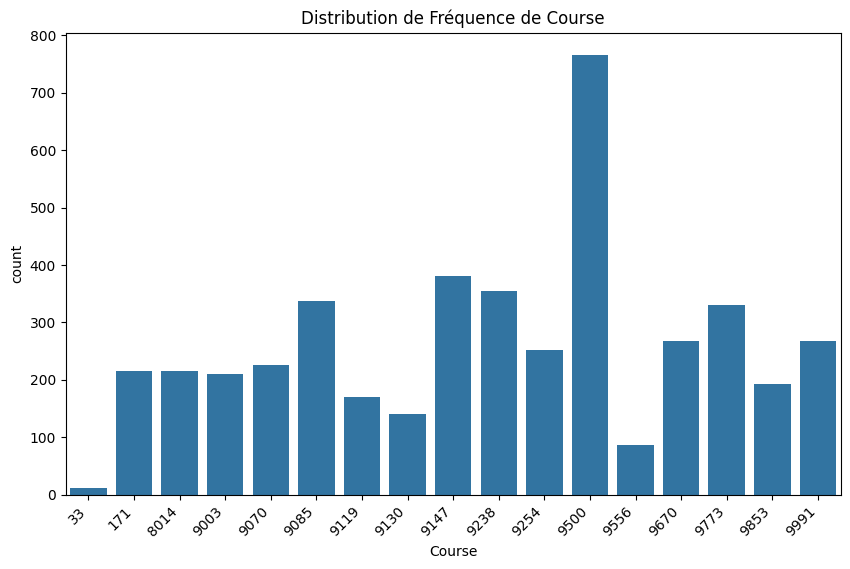

Column 'Daytime/evening attendance' not found in the DataFrame.
Column 'Nationality' not found in the DataFrame.


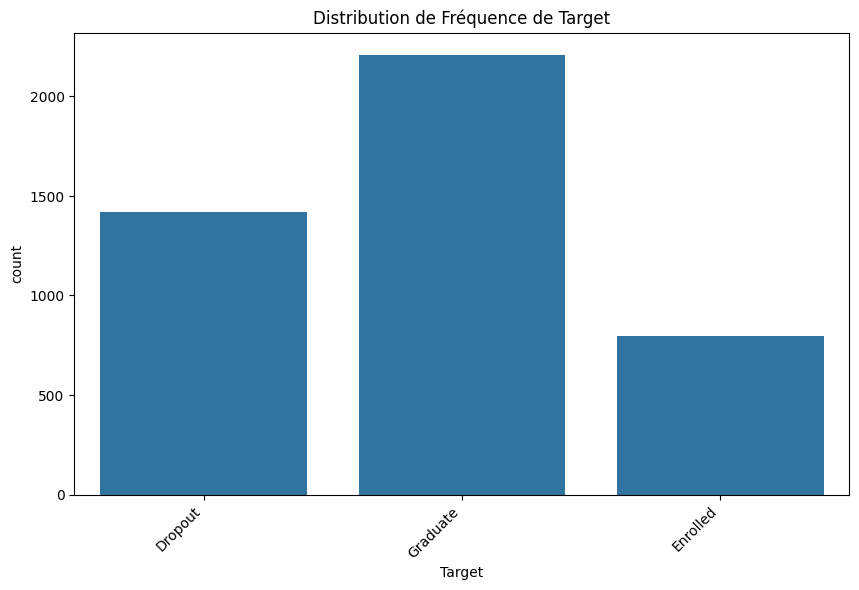

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_categorielles = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Nationality', 'Target']

for variable in variables_categorielles:
    # Check if the column exists in the DataFrame
    if variable in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=variable, data=df)
        plt.title(f'Distribution de Fréquence de {variable}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"Column '{variable}' not found in the DataFrame.")

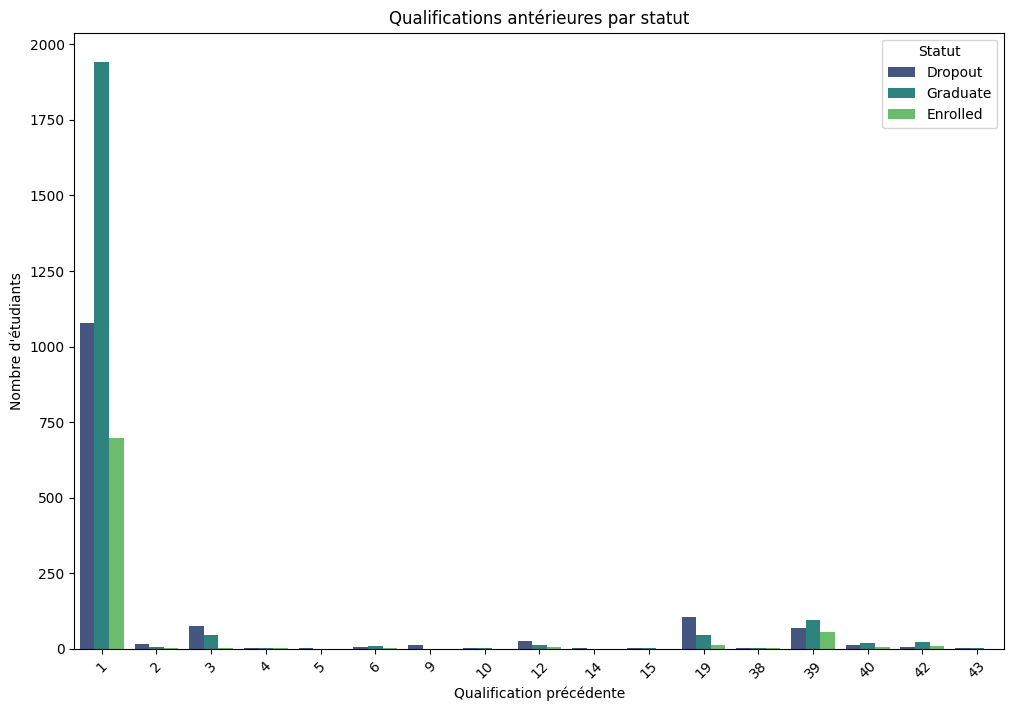

In [ ]:
# Countplot pour visualiser les qualifications antérieures par statut
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Previous qualification', hue='Target', palette='viridis')
plt.title('Qualifications antérieures par statut')
plt.xlabel('Qualification précédente')
plt.ylabel('Nombre d\'étudiants')
plt.legend(title='Statut', loc='upper right')
plt.xticks(rotation=45)
plt.show()


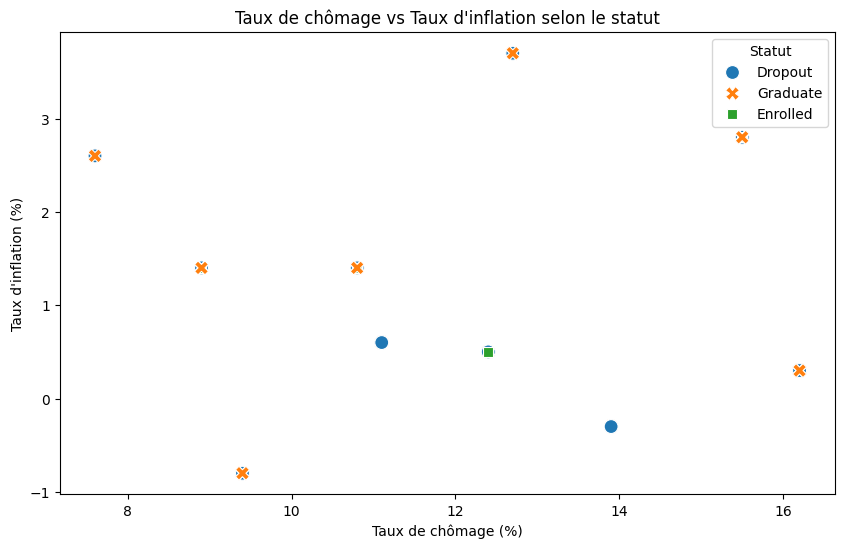

In [ ]:
# Scatterplot pour examiner la relation entre le taux de chômage et le taux d'inflation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment rate', y='Inflation rate', hue='Target', style='Target', s=100)
plt.title('Taux de chômage vs Taux d\'inflation selon le statut')
plt.xlabel('Taux de chômage (%)')
plt.ylabel('Taux d\'inflation (%)')
plt.legend(title='Statut')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

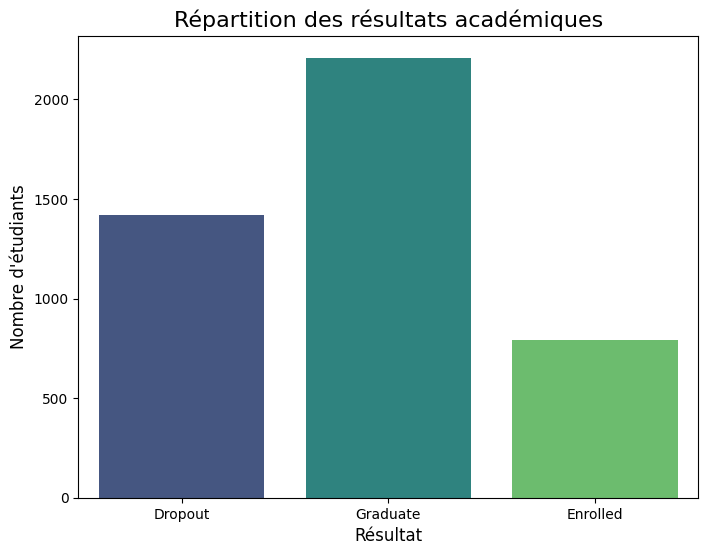

In [ ]:
# Charger les données dans un DataFrame (remplacer par votre propre fichier)
df = pd.read_csv('student_data.csv',sep=';')

# 1. Répartition des résultats académiques (Dropout vs Graduate)
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Répartition des résultats académiques', fontsize=16)
plt.xlabel('Résultat', fontsize=12)
plt.ylabel('Nombre d\'étudiants', fontsize=12)
plt.show()

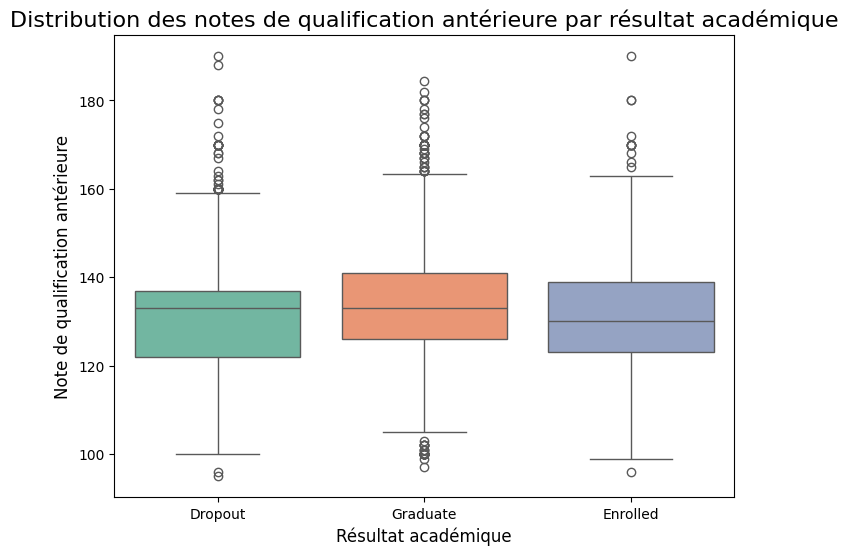

In [ ]:
# 2. Qualification antérieure (note) et résultat académique (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Previous qualification (grade)', data=df, palette='Set2')
plt.title('Distribution des notes de qualification antérieure par résultat académique', fontsize=16)
plt.xlabel('Résultat académique', fontsize=12)
plt.ylabel('Note de qualification antérieure', fontsize=12)
plt.show()

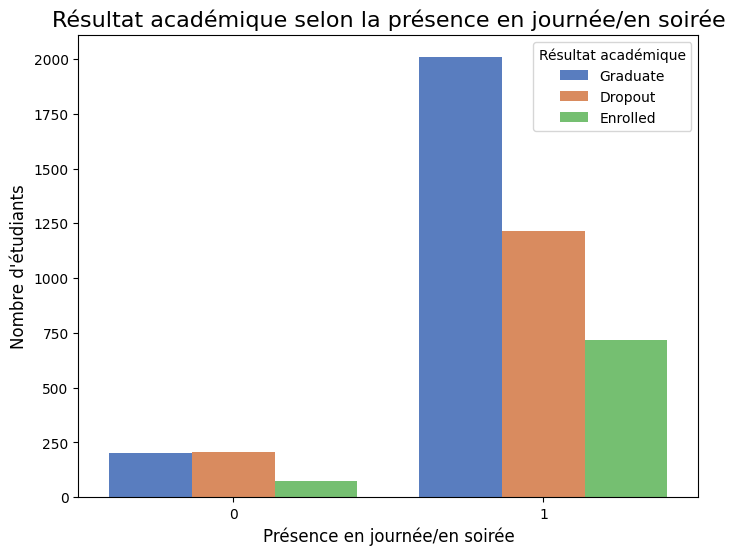

In [ ]:
# 3. Présence en journée/en soirée vs Résultat académique (Diagramme à barres empilées)
plt.figure(figsize=(8, 6))
sns.countplot(x='Daytime/evening attendance\t', hue='Target', data=df, palette='muted')
plt.title('Résultat académique selon la présence en journée/en soirée', fontsize=16)
plt.xlabel('Présence en journée/en soirée', fontsize=12)
plt.ylabel('Nombre d\'étudiants', fontsize=12)
plt.legend(title='Résultat académique')
plt.show()

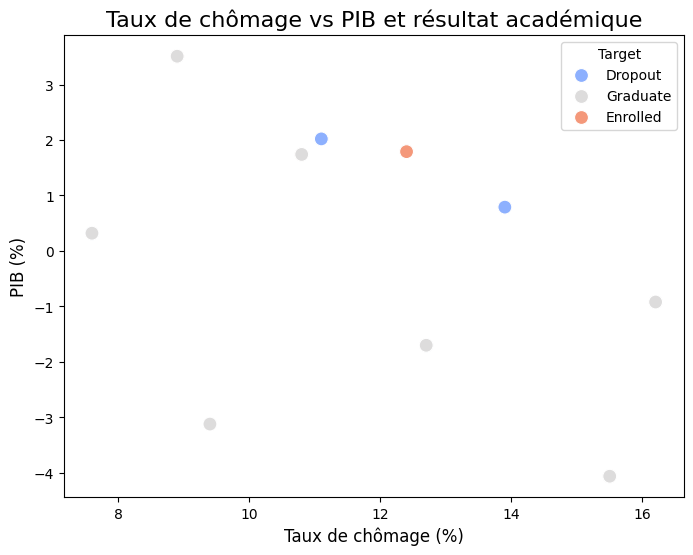

In [ ]:
# 4. Taux de chômage vs Résultat académique (Nuage de points)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment rate', y='GDP', hue='Target', data=df, palette='coolwarm', s=100)
plt.title('Taux de chômage vs PIB et résultat académique', fontsize=16)
plt.xlabel('Taux de chômage (%)', fontsize=12)
plt.ylabel('PIB (%)', fontsize=12)
plt.show()

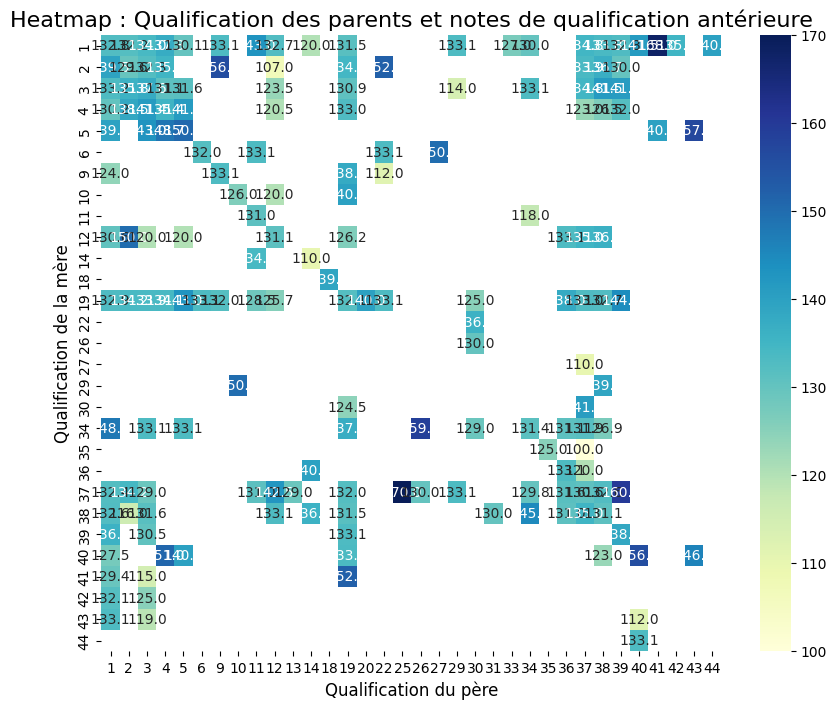

In [ ]:
# 5. Qualification des parents et réussite académique (Heatmap)
pivot_data = df.pivot_table(values='Previous qualification (grade)',
                            index='Mother\'s qualification',
                            columns='Father\'s qualification',
                            aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap : Qualification des parents et notes de qualification antérieure', fontsize=16)
plt.xlabel('Qualification du père', fontsize=12)
plt.ylabel('Qualification de la mère', fontsize=12)
plt.show()